In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

derrom_path = "../"
data_path = "../../data/"

import sys
sys.path.append(derrom_path)

import derrom

In [2]:
trajectories = derrom.utils.load_trajectories(filename=data_path + 'trajectories_n_kmax=200.npz')

trajectories = trajectories[::10]

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)


test_trajectory = derrom.utils.load_trajectories(filename=data_path + 'example_trajectory.npz')[0]
print('example trajectory loaded with shape: ', test_trajectory.shape)

100 loaded with n_kmax = 200
example trajectory loaded with shape:  (400, 200)


In [3]:
model = derrom.estimator(rdim=15, DE_l=2, intercept=True, full_hist=False,
                    optimizer=derrom.optimizers.ridge(alpha=10.**-3.0),
                    scaler=derrom.scalers.standardize_scaler(1.0),
                    dim_reducer=derrom.dim_reducers.SVD(),
                    NL_transformer=derrom.transformers.ELM_features(ELM_nodes=400))

model.fit(trajectories, targets='AR')

model.print_status()


full_hist:  False
intercept:  True
standardize:  True
rdim:  15
DE_l:  2
weights shape:  (431, 15)


In [4]:
pred = model.predict(test_trajectory)

print('rms error: ', model.get_error(test_trajectory, pred=pred, norm='rms') )
print('max error: ', model.get_error(test_trajectory, pred=pred, norm='max') )

rms error:  0.020215343371287702
max error:  0.1152724270480896


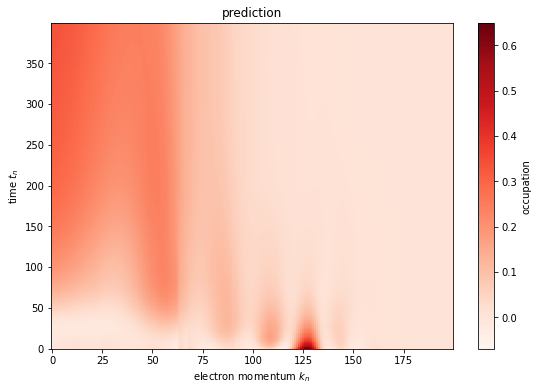

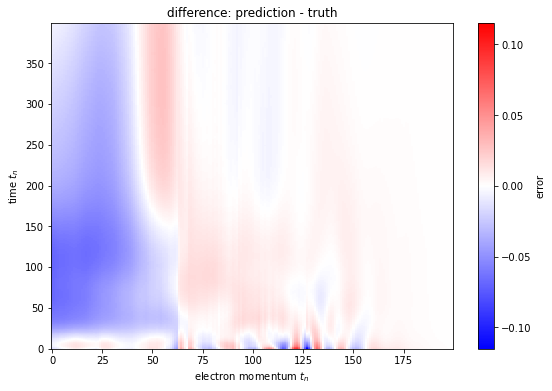

In [5]:

derrom.utils.plot_trajectory(pred, 'prediction')

derrom.utils.plot_difference(pred, test_trajectory, 'difference: prediction - truth')